In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps as integrate
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['lines.linewidth'] = 3

In [2]:
def gaussian(x,mu=0.,var=1.):
    """Returns the value of the Gaussian function.

    Parameters
    ----------
    x : float, array_like
        The x-values we would like to evaluate the function at
    mu : float
        The expectation value. Defaults to 0.
    var : float
        The variance. Defaults to 1.

    Returns
    -------
    float, array_like
        The values of the Gaussian function.
    """
    
    return np.exp(-0.5*(x-mu)**2/var)/np.sqrt(var*2*np.pi)


# Interactive teaching and knowledgement management with Jupyter

Klausurtagung BGT 2018

<u>Pribec, I.,</u>, Geier, D., Fattahi, E., Becker, T.


*Raitenhaslach, 30.11.2018*

## Agenda
1. Highlight the need for better coding practice, version control and (digital) knowledge management.
2. Introduce Jupyter Notebook as part of the solution
3. Provide a demonstration of using Jupyter to develop and document a script
4. Provide an example of how Jupyter can be used for teaching/learning

## Knowledge management in modern science

Science - from latin *scientia* for "knowledge".

Typical forms of exchanging and preserving knowledge: 
   * discussions with colleagues (lab knowledge or "know-how")
   * scientific posters and conference presentations
   * journal articles and books

But what about "digital" knowledge such as _computer programs_ and the _algorithms_/_procedures_ they encapsulate? How do we preserve this?

* Science - the systematic enterprise of building and organizing knowledge in the form of testable explanations and predictions.
* The amount of knowledge is overwhelming. 
* For books the gatekeepers are librarians, for scientific journals we have the publishing houses and distributors, on a local level we collect folders or entrust our files to a tool like Citavi or Endnote.

* part of the knowledge we don't really notice until they take it away are computer programs. Who would do a spreadsheet manually, plot a graph, perform a complex calculation.

## Digital know-how at the BGT

Where do we use programming at the BGT?

* Signal processing
* Image processing
* Multivariate statistics and machine learning
* Numerical simulation
* Scripts related to 3D printing, rheological analysis, mashing kinetics, ...? 

Besides for a few sentences in a paper or thesis, these tools are being lost, leading to a Sisyphean effort for each newcomer. 

Ultrasound, bioreactors, analytic devices

Color, io, feature detection, filtering, morphology, segmentation, restoration, transforms

Chemometrics

Control and optimization

Numerical simulation based on ODEs, PDEs and stochastic models


We have to break the cycle "one PhD student - one code" and learn to not reinvent the wheel.

The situation resembles this one:

<center>
<img src="imgs/phd_comic.jpg" alt="Scratch" class="phdcomic">
</center>

## Standing on the shoulders of Giants

"If I have seen further it is by standing on the shoulders of Giants." - Isaac Newton

"With an internet connection, you can stand on the shoulders of as many giants as you’d like." - 21. century programmer

Let me introduce you to a giant called Jupyter!

<center>
<img src="./imgs/jupyter_logo40.png" class="jupyter_logo"/>
<center>

We should aim to maximize preservation and improvement of existing tools, and not try to reinvent the wheel anymore. It is on this background that I would like to introduce...

## What is Jupyter?

"The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text."  - Jupyter Project

Jupyter is part of the larger Python ecosystem that includes packages such as [**SciPy**](https://www.scipy.org/) (scientific computing), [**Matplotlib**](https://matplotlib.org/) (plotting and visualization), [**Pandas**](https://pandas.pydata.org/) (statistics and data processing), [**Scikit-learn**](https://scikit-learn.org/stable/index.html) (machine learning), [**Scikit-image**](https://scikit-image.org/) (image processing) and many others.

Note that Jupyter is not limited to Python, and also has good support for languages such as [R](https://www.r-project.org/about.html) and [Julia](https://julialang.org/). Hence the name, **Ju**-**Py**-te**R** ;)

* Notebooks can be shared by email, uploaded to Dropbox or saved on sites such as Github and GitLab for with the benefit of version control.
* Ability to embed interactive output (widgets, video, images...).

![](https://imgs.xkcd.com/comics/python.png)

## Some more Jupyter trivia

* The name **Ju**-**Py**-te-**R** is a reference to the three core languages supported by Jupyter, which are: Julia, Python, and R. The name is also an homage to Galileo's astronomical notebooks recording the discovery of the moons of Jupiter 
* In 2017 Jupyter won the ACM Software System Award "for developing a software system that has had a lasting influence, reflected in contributions to concepts, in commercial acceptance, or both." Previous awards have been given to Unix, Xerox Alto (the first desktop computer), System R (predecessor of SQL), the World Wide Web, S (predecessor of R).
* Scientists from the LIGO detector that discovered gravitational waves (and won a Nobel prize) used Jupyter to process the results which are openly available.
* Nature recently published an article on
[Why Jupyter is data scientists’ computational notebook of choice](https://www.nature.com/articles/d41586-018-07196-1), Nature 563, 145-146 (2018)
* Companies that use Jupyter: Google, Microsoft, IBM, Bloomberg, Soundcloud, NASA...

## Jupyter demonstration

### Kalman filter in a nutshell

The Kalman filter is a state estimation algorithm used for signal processing and data fusion. Essentially it provides a rule on how to combine multiple inaccurate sources of information to yield a more accurate estimate of the state.

Kalman filters can be found at work in every satellite navigation device, as well as in your smartphone and notebook touchpads. Other applications include computer vision, weather forecasting and industrial process control.

### Multiplying gaussians

The foundation for understanding Kalman filters are Gaussian functions.

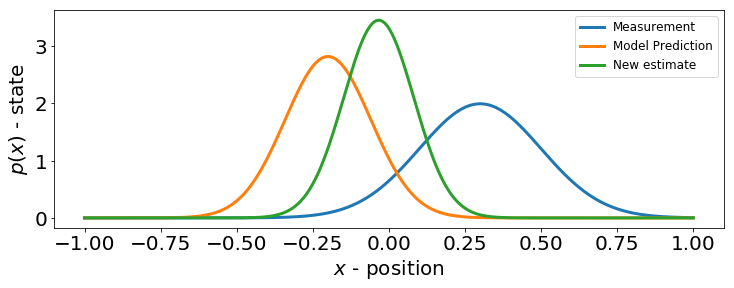

In [14]:
x = np.linspace(-1,1,500)
g1 = gaussian(x,0.3,0.04)
g2 = gaussian(x,-0.2,0.02)
plt.plot(x,g1,x,g2)

plt.xlabel(r"$x$ - position"); plt.ylabel(r"$p(x)$ - state")

gnew = g1*g2/integrate(g1*g2,x) # Multiply and normalize resulting distribution
plt.plot(x,gnew);
plt.legend(labels=["Measurement","Model Prediction","New estimate"],fontsize=12); plt.show()

### The filter cycle

<center>
<img src="my_kalman_cycle.png">
</center>

### Prediction step

The prediction moves the state of the system $x$ forward according to a process model. In terms of linear algebra it breaks down to this:

\begin{align}
x' &= Ax + Bu \\
P' &= A P A^T + Q
\end{align}

In [4]:
def prediction_update(x,u,A,B,P,Q):
    
    xp = A.dot(x) + B.dot(u)
    Pp = A.dot(P).dot(A.T) + Q
    
    return xp, Pp

### Measurement step

The predictions are then corrected by the measurements:

\begin{align}
x &= x' + K(y-Cx')\\
K &= P' C^T (C P' C^T + R)^{-1}\\
P &= P' - KCP'
\end{align}

In [5]:
def measurement_update(xp,y,C,Pp,R):
    
    K = Pp.dot(C.T)*np.linalg.pinv(C.dot(Pp).dot(C.T) + R)
    x = xp + K.dot(y - C.dot(xp))
    P = Pp - K.dot(C).dot(Pp)
    
    return x, P, K

### Initializing the filter

In [16]:
num_iter = 100 # Number of iterations
truth = 42.0   # Truth value ;)

y = np.random.normal(truth,1,size=num_iter) # Generate measurements

Q = 0.005 # Process variance

# Initalize storage arrays
xp = np.zeros(num_iter); Pp = np.zeros([num_iter,1])
x = np.zeros(num_iter); P = np.zeros([num_iter,1]); K = np.zeros(num_iter)

R = np.array([[1.5**2]]) # Measurement variance

x[0] = 45.0 # Initial estimate
P[0] = np.array([[1.0]])  # Initial covariance

A = np.array([[1]]); B = np.array([[0]]); u = 0; C = np.array([[1]]) # Trivial model

### Performing the filtering

With the `prediction` and `measurement_update` functions defined, it is finally time to do some filtering!

In [17]:
# Kalman filter time loop
for k in range(1,num_iter):
    
    xp[k], Pp[k] = prediction_update(x[k-1],u,A,B,P[k-1],Q)
    x[k],P[k],K[k] = measurement_update(xp[k],y[k],C,Pp[k],R)

Let's take a look at the first 20 values and check if they are falling:

In [18]:
x[:10]

array([45.        , 44.31405572, 43.89307115, 43.40592468, 43.36215376,
       43.07188451, 42.9377799 , 42.97003831, 42.91670143, 42.73597774])

### Plotting the results

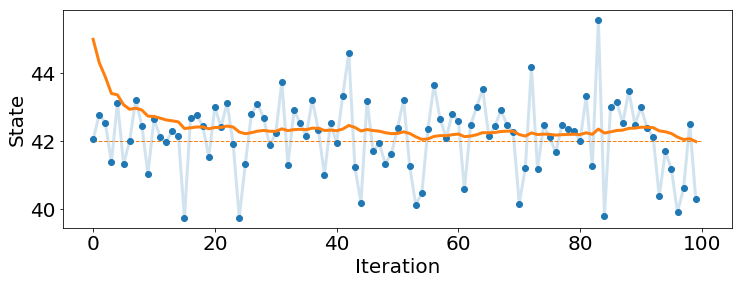

In [19]:
plt.plot(y,'o')
plt.plot(y,'-',color='C0',alpha=0.2)
plt.plot(x,'-')
plt.hlines(truth,0,num_iter,lw=1,linestyle='dashed',color='C1')
plt.xlabel("Iteration")
plt.ylabel("State")
plt.show()

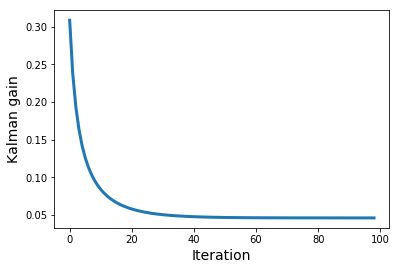

In [10]:
plt.plot(K[1:])
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Kalman gain",fontsize=14)
plt.show()

## Other notebook features

* Videos, audio and images can be embedded in notebooks.
* You can build different widgets (sliders, buttons, dropdown menus) to interact with your data.
* Notebooks can be exported to HTML and served as a website or saved as a pdf.
* Presentation mode (used right now!)
* Built-in "magic" commands for code profiling, shell access and much more.

## Ideas for using Jupyter

* Documenting code functionality and computational workflows
* Laboratory journal with interactive elements
* Paper supplementary material
* Executable books
* Scientific blogging tool
* Lecture course material (possibility of automatically graded assignments)


## Summary

* Jupyter Notebook is a great tool for exploratory data analysis, scientific visualization, numerical simulation, and much more.
* Jupyter eliminates the complexity of getting started programming and facilitates rapid iteration and learning, and also facilitates teaching computational topics.
* Instead of focusing on learning to code, Jupyter can help us focus on _coding to learn_.
* By documenting our computational work we can make it easier for those following our footsteps.

If you want to try Jupyter yourself simply visit the site [try.jupyter.org](https://jupyter.org/try).





```Python
if questions:
    try:
        answer()
    except RuntimeError:
        pass
else:
    print('Thank you')
```

[A gallery of interesting notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

[Interactive notebooks: sharing the code](https://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)

[IPython & Project Jupyter](https://speakerdeck.com/fperez/ipython-and-project-jupyter-a-language-independent-architecture-for-open-computing-and-data-science)

[The Scientific Paper is Obsolete](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/)


In [11]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from ipywidgets import interact

def plot_sine(frequency=4.0, grid_points=12, plot_original=True):
    """
    Plot discrete samples of a sine wave on the interval ``[0, 1]``.
    """
    x = np.linspace(0, 1, grid_points + 2)
    y = np.sin(2 * frequency * np.pi * x)

    xf = np.linspace(0, 1, 1000)
    yf = np.sin(2 * frequency * np.pi * xf)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('signal')
    ax.set_title('Aliasing in discretely sampled periodic signal')

    if plot_original:
        ax.plot(xf, yf, color='red', linestyle='solid', linewidth=2)

    ax.plot(x,  y,  marker='o', linewidth=2)

# The interact function automatically builds a user interface for exploring the
# plot_sine function.
interact(plot_sine, frequency=(1.0, 22.0, 0.5), grid_points=(10, 16, 1), plot_original=True);

interactive(children=(FloatSlider(value=4.0, description='frequency', max=22.0, min=1.0, step=0.5), IntSlider(…

In [12]:
# Import matplotlib (plotting), skimage (image processing) and interact (user interfaces)
# This enables their use in the Notebook.
%matplotlib inline
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray

from ipywidgets import interact, fixed

# Extract the first 500px square of the Hubble Deep Field.
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use interact to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001));

interactive(children=(IntSlider(value=30, description='max_sigma', max=40, min=10, step=2), FloatSlider(value=…